# GRU: Gate Recurrent Units
Fue introducida en 2014 by Cho et. al. Es parecida a la LSTM,
pero mas simplificada, no tiene `output gate`. Los autores reclaman mejor performance que las LSTM. Tambien se usan para
musica polifonicda, lenguaje hablado (speech language) para NLP
en general.




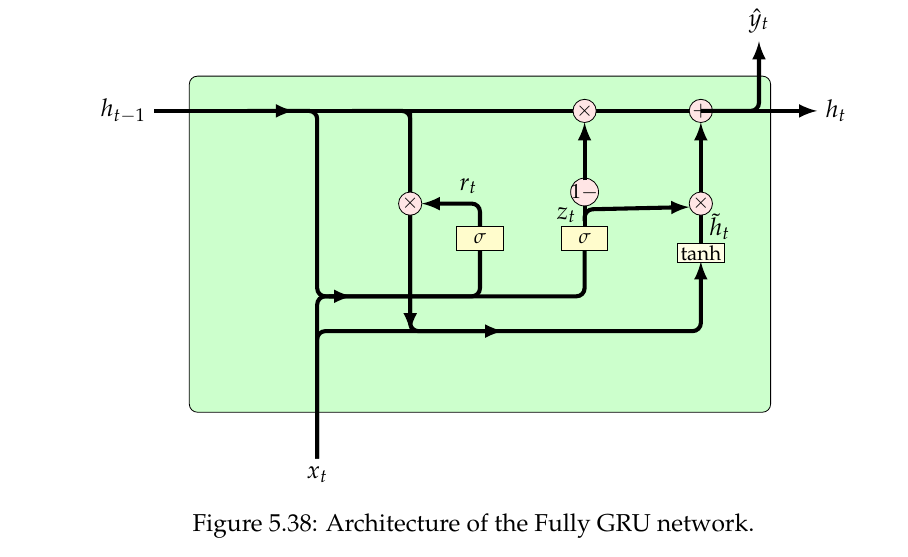

$$z_t = \sigma( W_z x_t + U_z h_{t-1} + b_z )  $$
$$r_t = \sigma( W_r x_t + U_r h_{t-1} + b_r )  $$
$$\hat{h}_t = \tanh( W_h x_t + U_h r_t \circ h_{t-1} + b_h )  $$
$$h_t = (1 - z_t) \circ h_{t-1} + z_t \circ \hat{h}_t $$

> Add blockquote



* $x_t$ es es el vector de entrada
* $h_t$ es es el vector de salida (el estado)
* $\hat{h}_t$ un valor intermedio para calcular $h_t$

# Metodos semi-superisados o no supervisados.
A parte de otros metodos que explicamos aca incluiremos las redes generativas. En las redes generativas estudiaremos:

* VAE: Variational Autoencoders.
* GANs: Generative Adversary Networks.
* RNNs, LSTMs, Transformers

Comenzamos con los autoencoders.
Los autoencoders no son supervisados por que los datos de entrada se pueden usar como etiquetas. El uso, para generar (variational autoencoders) caras humanas, o animales, producir musica (Leandro, fugas de Bach),
generar texto etc. Las aplicaciones principales de los autoencoders "vanilla".

* Reduccion de dimensionalidad
* Eliminacion de ruido
* otros


La idea de los autoencoders son dos redes:

* encoder: toma los datos y los reduce de tamanho a un espacio que se llama **latent space**. (embudo)
* decoder: toma el **latent space** y de el trata de regresar a los datos originales.

Estos no son los encoder/decoder clasicos. Estos ultimos los veremos mas adelane.

Existen varias formas de crear estas redes (encoder/decoder), por ejemplo

* Fully contected layers (MLP) (dibujo mas abajo)
* Usar RNN, LSTM (sequence-to-sequence data). Por ejemplo para generar nueva musica.
* CNN: Puede usar autocencoders, donde el CNN reduce la dimension y el mismo CNN la puede recuperar. En el encoder el CNN usa: encoder $\rightarrow$ convoucion + activacion + bach-normalization + pooling, el decoder $\rightarrow$ **transposed convolution** + activacion + bach normalization.











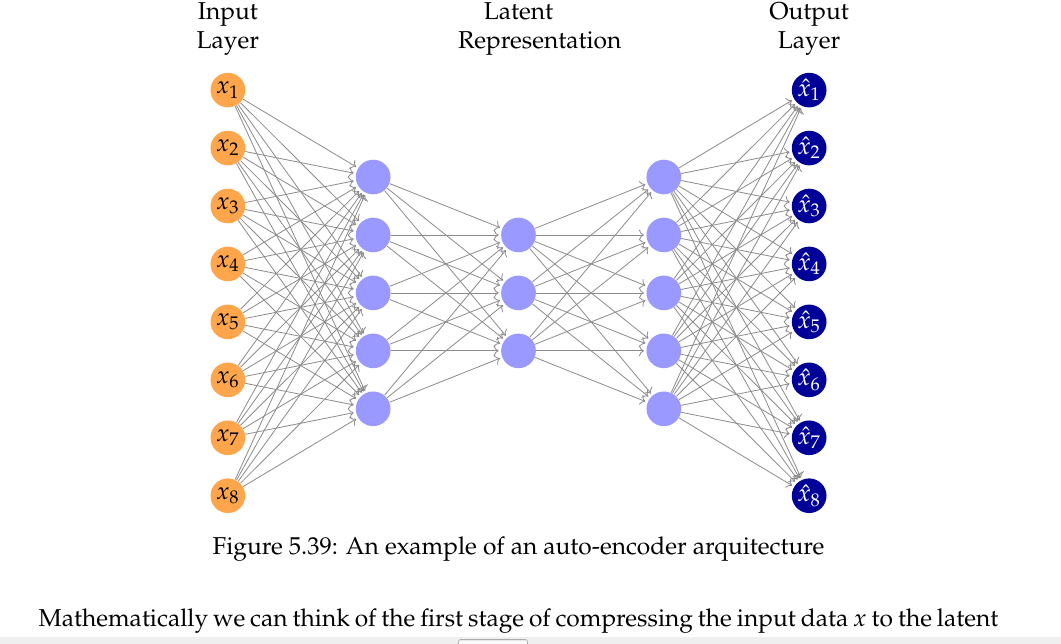

Esta figura corresponde a un autoencoder fully connected (MLP).

### Formulemos el problema matematicamente:
Para llegar al **latent space**, llegamos mediante una funcio $f(x)$ . Para llegar al espacio de salida a partir del latent space tenemos otra function que es

$$g(f(x)) = r(x) = \hat{x} $$
La funcion objetivo es

$$J(\theta) = \| x - \hat{x} \|^2 + \lambda R(x) $$
Hay una referencia en las notas Rifai et. al, 56, habla de
**contractive auto-encoders** (CAE) para reducir ruido, para
**manifold learning** ellos usan la funcion $R$

$$R(x) = \left \| \frac{\partial f(x)}{\partial x}  \right \|^2 $$
Se pueden usar otras normas, o se pueden otras funciones de costo
como la cross entropy $-x \log \hat{x} - (1 - x ) \log (1-\hat{x})$.

### Reduccion de dimensionalidad, con auto-encoders.
En el ejemplo de la grafica la reduccion de dimensionalidad es de 8 a 3.

* cual es la dimension? el numero de variables.
* cual es la dimension intrinsica. Es el menor numero de variables posibles. Vamos a ver ejemplos de esto.

Veamos dos ejemplos de reduccion de dimensionalidad y dimension intrisica, simples.

Piense una recta en un espacio de 1 millon de dimensiones.
Matematicamente la podemos describir como

\begin{eqnarray}
L_{PQ} : \mathbb{R} &\to& \mathbb{R}^{10^6} \\
t &\to& P + t(Q-P)
\end{eqnarray}

* Que diferencia hay entre reduccion de dimensionalidad usando PCA y autoencoders? El PCA es lineal, y la recta muestra la direccion principal. Que pasa si el modelo no es lineal?
Piense en una helice.
En 3D la helice se puede escribir como

\begin{eqnarray}
H : \mathbb{R} &\to& \mathbb{R}^{10^6} \\
t &\to& (\cos t, \sin t, t)
\end{eqnarray}
Esta helice (helix)  altamente no lineal. Es imposible con PCA comprimir los datos que vienen de una helice. El auto-encoders, como es una red neuronal (con activaciones no lineales) vence al PCA en este caso.




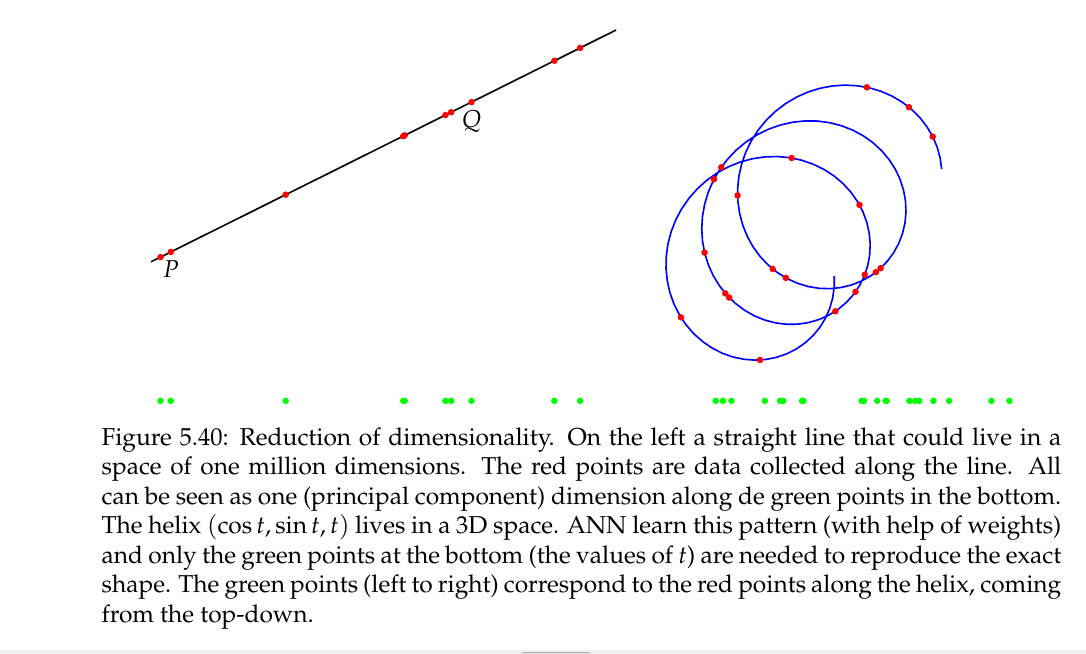

**Ejemplo 1**: Codigo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# cargamos los datos mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


# define dimensions
input_shape = (28, 28, 1)
encoding_dim = 32 # amazing

# define the autoencoder model
input_img = Input(shape=input_shape)
x = Flatten()(input_img)
# encoded tiene dimension 32
encoded = Dense(encoding_dim, activation='relu')(x)

# def ine the decoder
decoded = Dense(np.prod(input_shape),  activation='sigmoid')(encoded)
decoded = Reshape(input_shape)(decoded)

# contruimos el autoencoder
autoencoder = Model(input_img, decoded)

# contruimos el encoder
encoder = Model(input_img, encoded)

# compilamos el autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# train the autoencoder
autoencoder.fit(x_train, x_train,
        epochs=50, batch_size=256,
        shuffle=True, validation_data=(x_test, x_test))






Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3908 - val_loss: 0.1891
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1802 - val_loss: 0.1531
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1481 - val_loss: 0.1325
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1304 - val_loss: 0.1202
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1191 - val_loss: 0.1116
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1115 - val_loss: 0.1061
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.1059 - val_loss: 0.1019
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1021 - val_loss: 0.0988
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0994 - val_loss: 0.0967
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0973 - val_loss: 0.0952
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0962 - val_loss: 0.0943
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


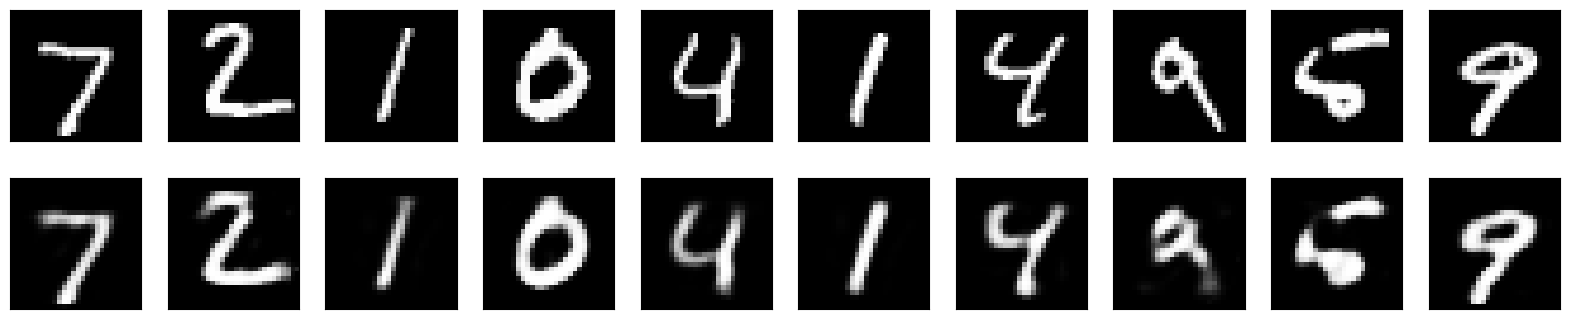

Encoded representations of the firs 10 test images
[[ 2.8948064  10.369809    5.6781626   8.3253355   5.6547174   3.5167413
   6.0250726   7.778657    2.2648509   4.459923    0.83139086  5.283359
   5.0400305  14.252993    2.8259332   5.716316    8.657775    2.8882332
   4.341743    3.3171558   8.186627    4.3492155   7.6785502   8.250313
  11.95378     2.7808204   3.5964785   5.049078    5.9794016  10.100645
   8.612417   12.629019  ]
 [ 5.6103992   0.8731192  15.721325    8.184327   11.652917    9.225598
   8.094302   15.254908   10.421559    7.585201    3.0018315   2.1462681
   4.1173983   1.6932057  13.839929    5.562246    0.80664843 17.130095
   6.5352254   8.500243    9.63749    12.851658    7.720217    4.8699503
   7.752551    4.925818   11.603192   11.777314    9.434769    7.7385607
   9.693879    1.9068159 ]
 [ 1.297837    1.3110065   6.320919    3.5326576   4.45535     4.575795
   0.9731362   1.9827125   3.8593776   6.169794    7.4991784   4.906763
   5.126527    1.2159048  

In [3]:
encoded_imgs = encoder.predict(x_test)
# decoded_imgs = autoencoder.predict(x_test)

# grafiquemos
n=10 # numero de figuras a graficar
plt.figure(figsize=(20,4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display the reconstructed
    ax = plt.subplot(2, n, i+1+n)
    decoded_imgs = autoencoder.predict(x_test)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# vamos a ver los numeros del espacio "latente"
print("Encoded representations of the firs 10 test images")
print(encoded_imgs[:10])

# Proxima clase.
Mas de autoencoders con MNIST, limpieza de ruido.